# TP 2 

## *Étude des rendements en profondeur dans l'eau*

**Contacts :**

- Verónica Sorgato: [veronica.sorgato88@gmail.com](mailto:veronica.sorgato88@gmail.com)
- Samy Kefs: [samy.kefs@inserm.fr](mailto:samy.kefs@inserm.fr)
- Yannick Arnoud: [yannick.arnoud@lpsc.in2p3.fr](mailto:yannick.arnoud@lpsc.in2p3.fr)

---
**Données :**

1. À partir du site du NIST, récupérer dans un fichier Excel, les coefficients d’atténuation (mu_att) et d’absorption en énergie (mu_en) du PMMA (Polyméthyl Méthacrylate) en fonction de l’énergie des photons.

---

## **Question 2**

Affichage des valeurs mu_att et mu_en en fonction de l'énergie en échelle doublement logarithmique

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('/Users/samy/Desktop/Thése/TP_Dosimetrie_M2/TP2/DataPMMA.xlsx')

energy = df['energy'].to_numpy()
mu_att = df['mu/rho  (cm2/g)'].to_numpy()
mu_en = df['muen/rho (cm2/g)'].to_numpy()



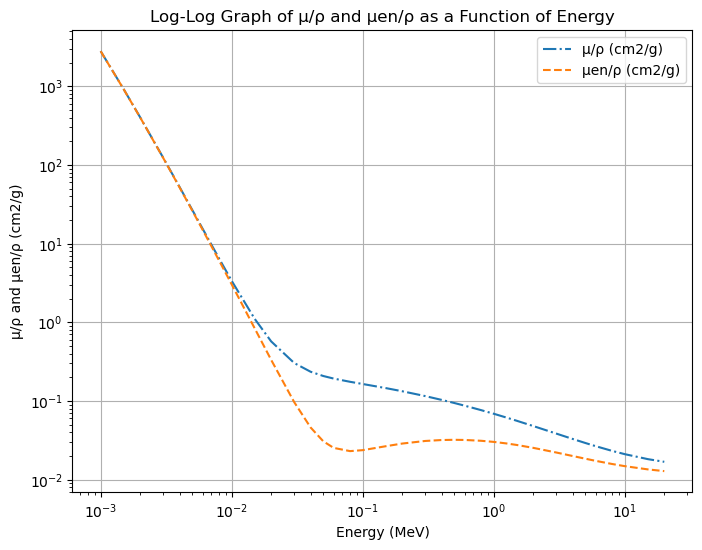

In [3]:
# Create the log-log graph
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.loglog(energy, mu_att, label='μ/ρ (cm2/g)',linestyle="-.")  # Create a log-log graph for μ/ρ
plt.loglog(energy, mu_en, label='μen/ρ (cm2/g)',linestyle='--')  # Create a log-log graph for μen/ρ

# Add labels and a legend
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ and μen/ρ (cm2/g)')
plt.title('Log-Log Graph of μ/ρ and μen/ρ as a Function of Energy')
plt.legend()

# Display the graph
plt.grid(True)  # Add a grid for better readability
plt.show()


---
## **Question 2**

2. Ajuster ces points par un modèle linéaire, et afficher sur le même graphe cette courbe d’ajustement. Commenter.

---

In [4]:
# For exemple 
energy = np.array([10, 20, 30, 40, 50])  # Énergies en keV
mu_att = np.array([0.05, 0.1, 0.15, 0.2, 0.25])  # Coefficients d'atténuation en cm^-1


%timeit energy2 = energy[...,None]


%timeit energy1 = energy.reshape(-1, 1)




275 ns ± 139 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
450 ns ± 88.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


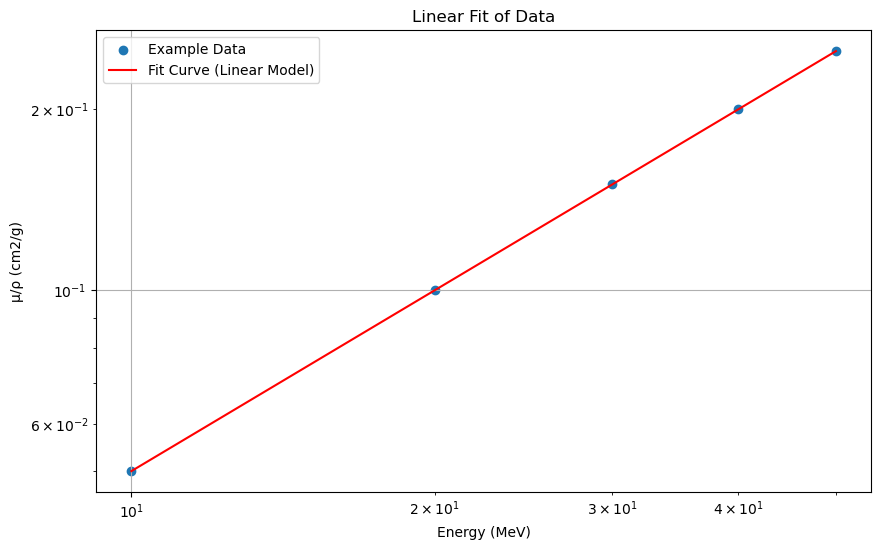

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

energy1 = energy[...,None]
mu_att1 = mu_att[...,None]

model.fit(energy1, mu_att1)

# Predict the fitted values
mu_att_pred = model.predict(energy1)

# Display the results
plt.figure(figsize=(10, 6))
plt.scatter(energy1, mu_att1, label='Example Data')
plt.plot(energy1, mu_att_pred, color='red', label='Fit Curve (Linear Model)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Linear Fit of Data')
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.grid(True)
plt.show()



---
## **Question 3**

3. Tester d’autres types d’ajustement. Au vu des graphiques obtenus, êtes-vous satisfaits du résultat ? Vous pouvez prendre comme référence d’une courbe au comportement « sain » celle affichée sur le site NIST.
---

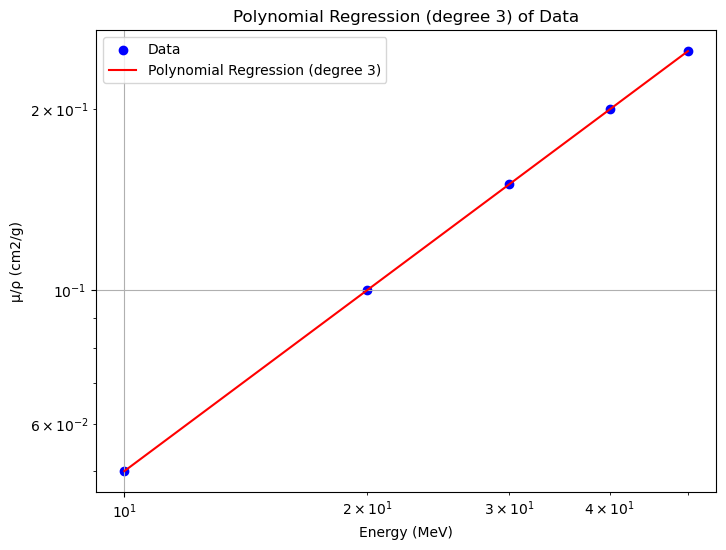

In [10]:
from sklearn.preprocessing import PolynomialFeatures


# Data
x = np.copy(energy)
y = np.copy(mu_att)

# Create a polynomial regression model of degree 3
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))

model = LinearRegression()
model.fit(x_poly, y)

# Predict the fitted values
y_pred = model.predict(x_poly)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_pred, label='Polynomial Regression (degree 3)', color='red')
plt.xscale('log')
plt.yscale('log')   
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.title('Polynomial Regression (degree 3) of Data')
plt.legend()
plt.grid(True)
plt.show()


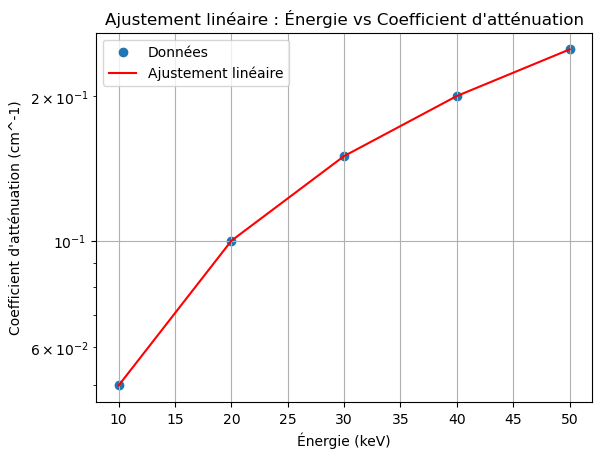

In [11]:
from scipy import stats
# Data


slope, intercept, r_value, p_value, std_err = stats.linregress(energy, mu_att)
fit_line = slope * energy + intercept

# Tracé du graphique de dispersion
plt.scatter(energy, mu_att, label='Données')
plt.plot(energy, fit_line, color='red', label='Ajustement linéaire')
plt.xlabel('Énergie (keV)')
plt.ylabel('Coefficient d\'atténuation (cm^-1)')
plt.title('Ajustement linéaire : Énergie vs Coefficient d\'atténuation')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()





In [8]:
from scipy.optimize import least_squares
# Definition of the exponential function to fit
def exponential_func(x, a, b, c):
    return a * np.exp(b * x + c * x**2)

# Residual function for fitting
def residual_func(params, x, y):
    return exponential_func(x, *params) - y

# Data
x = energy
y = mu_att

# Fit the curve with the exponential function using least_squares
result = least_squares(residual_func, [1, 1, 1], args=(x, y))

# Predict the fitted values
y_pred = exponential_func(x, result.x[0], result.x[1], result.x[2])

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_pred, label='Exponential Regression (least_squares)', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.title('Exponential Regression (least_squares) of Data')
plt.legend()
plt.grid(True)
plt.show()



/var/folders/6b/z5pymjhd7k73d1pnfd32p2th0000gn/T/ipykernel_45491/3387629659.py:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x + c * x**2)


ValueError: Residuals are not finite in the initial point.

---
## **Question 4**

4. Essayer l’interpolation linéaire en échelle logarithmique et tracer là. Est-ce que vos résultats sont meilleurs ?

---

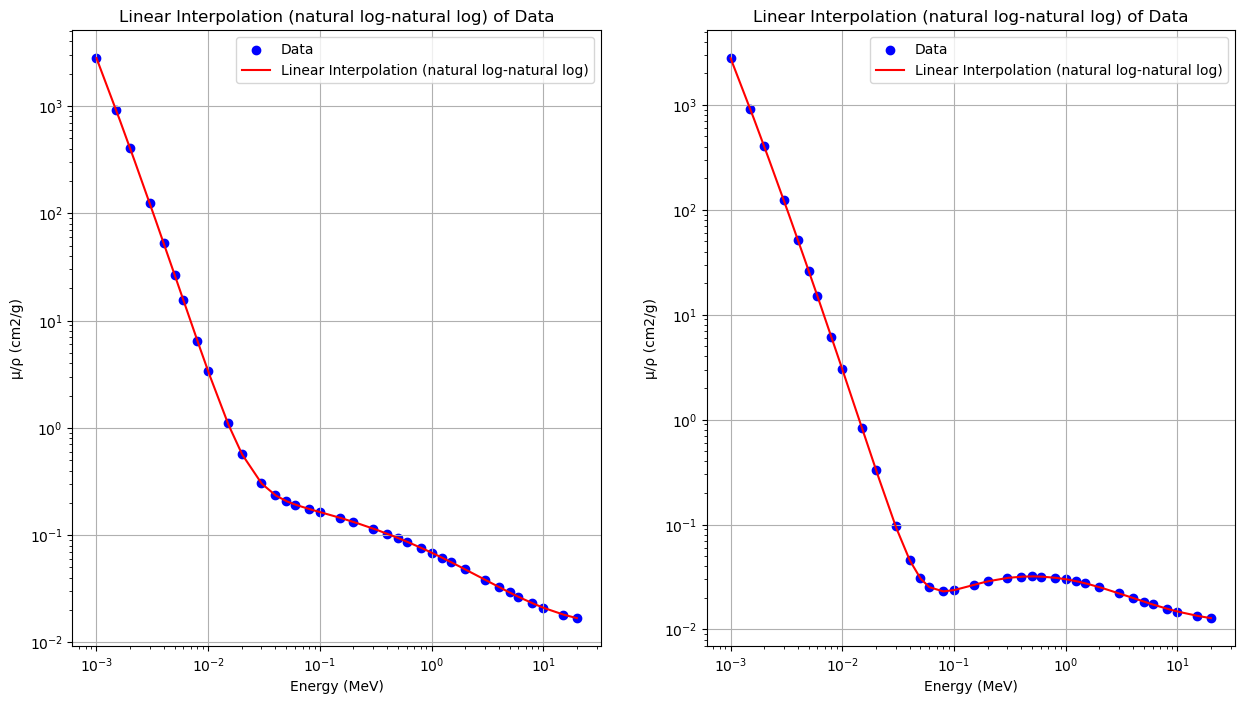

In [ ]:
# Data
x = energy
y_att = mu_att
y_en = mu_en

# Convert data using natural logarithm (ln, base e)
x_ln = np.log(x)
y_ln_att = np.log(y_att)
y_ln_en = np.log(y_en)

# Interpolation points in natural logarithm scale
x_interp_ln = np.linspace(min(x_ln), max(x_ln), 10000)

# Perform linear interpolation in natural logarithm scale
y_interp_ln_mu_att = np.interp(x_interp_ln, x_ln, y_ln_att)
y_interp_ln_mu_en = np.interp(x_interp_ln, x_ln, y_ln_en)

# Convert back to the original scale
x_interp = np.exp(x_interp_ln)
y_interp_att = np.exp(y_interp_ln_mu_att)
y_interp_en = np.exp(y_interp_ln_mu_en)

# Create the plot
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.scatter(x, y_att, label='Data', color='blue')
plt.plot(x_interp, y_interp_att, label='Linear Interpolation (natural log-natural log)', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.title('Linear Interpolation (natural log-natural log) of Data')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x, y_en, label='Data', color='blue')
plt.plot(x_interp, y_interp_en, label='Linear Interpolation (natural log-natural log)', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.title('Linear Interpolation (natural log-natural log) of Data')
plt.legend()
plt.grid(True)
plt.show()


 ---
 ## **Question 5**
 5. Avec votre meilleur ajustement, trouver les valeurs de $\mu_{att}$ et $\mu_{en}$ pour des énergies de faisceaux de photons de 20 keV, 140 keV, 6 MeV et 18 MeV.

---


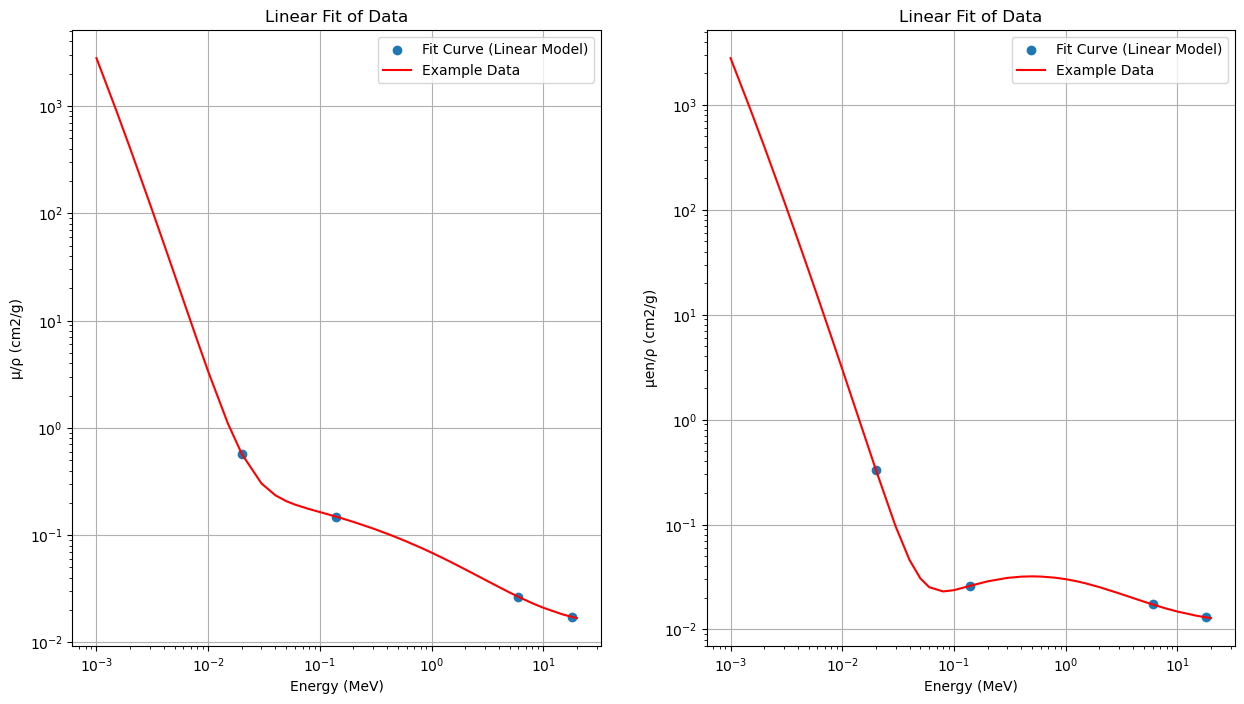

In [ ]:

newEnergy = np.array([0.02, 0.140, 6, 18])

mu_att_pred = np.exp(np.interp(np.log(newEnergy), np.log(energy), np.log(mu_att)))
mu_en_pred = np.exp(np.interp(np.log(newEnergy), np.log(energy), np.log(mu_en)))

# Display the results
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.scatter(newEnergy, mu_att_pred, label='Fit Curve (Linear Model)')
plt.plot(energy, mu_att , color='red', label='Example Data')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Linear Fit of Data')
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(newEnergy, mu_en_pred, label='Fit Curve (Linear Model)')
plt.plot(energy, mu_en , color='red', label='Example Data')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Linear Fit of Data')
plt.xlabel('Energy (MeV)')
plt.ylabel('μen/ρ (cm2/g)')
plt.grid(True)
plt.show()


In [ ]:
import tabulate as tab

# Data
print(tab.tabulate(np.array([newEnergy, mu_att_pred, mu_en_pred]).T, headers=['Energy (MeV)', 'μ/ρ (cm2/g)', 'μen/ρ (cm2/g)'],tablefmt='fancy_outline'))

╒════════════════╤═══════════════╤═════════════════╕
│   Energy (MeV) │   μ/ρ (cm2/g) │   μen/ρ (cm2/g) │
╞════════════════╪═══════════════╪═════════════════╡
│           0.02 │     0.5714    │       0.3328    │
│           0.14 │     0.148594  │       0.0260545 │
│           6    │     0.02659   │       0.01731   │
│          18    │     0.0173259 │       0.0130579 │
╘════════════════╧═══════════════╧═════════════════╛


---
## **Context** 

Pour les prochaines questions, on considère une fluence de photons par $cm^{2}$ mesurée à 1m de la source. On dispose d’un fantôme de PMMA de 1m de hauteur, dont la surface est placée à 1m de la source.

---


---
## **Question 1**

1. Calculer la dose absorbée à l’équilibre électronique à la surface du fantôme. Commenter.

---




In [ ]:
flux = 1e11
mass = 1e-3
def compute_dose(mu_en, rho, flux, mass, energy):
    return (energy * 1e6 * 1.602e-19 * mu_en * rho * flux) / mass

dose = compute_dose(mu_en_pred, 1.19, flux, mass, newEnergy)
dose

array([0.12688865, 0.06953757, 1.97996627, 4.4807912 ])

In [ ]:
print(tab.tabulate(np.array([newEnergy, dose]).T, headers=['Energy (MeV)', 'Dose (Gy)'],tablefmt='fancy_outline'))

╒════════════════╤═════════════╕
│   Energy (MeV) │   Dose (Gy) │
╞════════════════╪═════════════╡
│           0.02 │   0.126889  │
│           0.14 │   0.0695376 │
│           6    │   1.97997   │
│          18    │   4.48079   │
╘════════════════╧═════════════╛


In [ ]:
depth = np.linspace(0, 100, 1001)

def compute_dose_depth_parallel(dose, depth, mu_att,rho):
    doseParallel = []
    for i in range(dose.shape[0]):
        doseParallel.append(dose[i] * np.exp(-mu_att[i] * rho * depth))
    return np.asarray(doseParallel)
doseDepthParallel = compute_dose_depth_parallel(dose, depth, mu_att_pred, 1.19)
print(doseDepthParallel.shape)



(4, 1001)


**The percentage depth dose, must be depicted normalized to the max.**

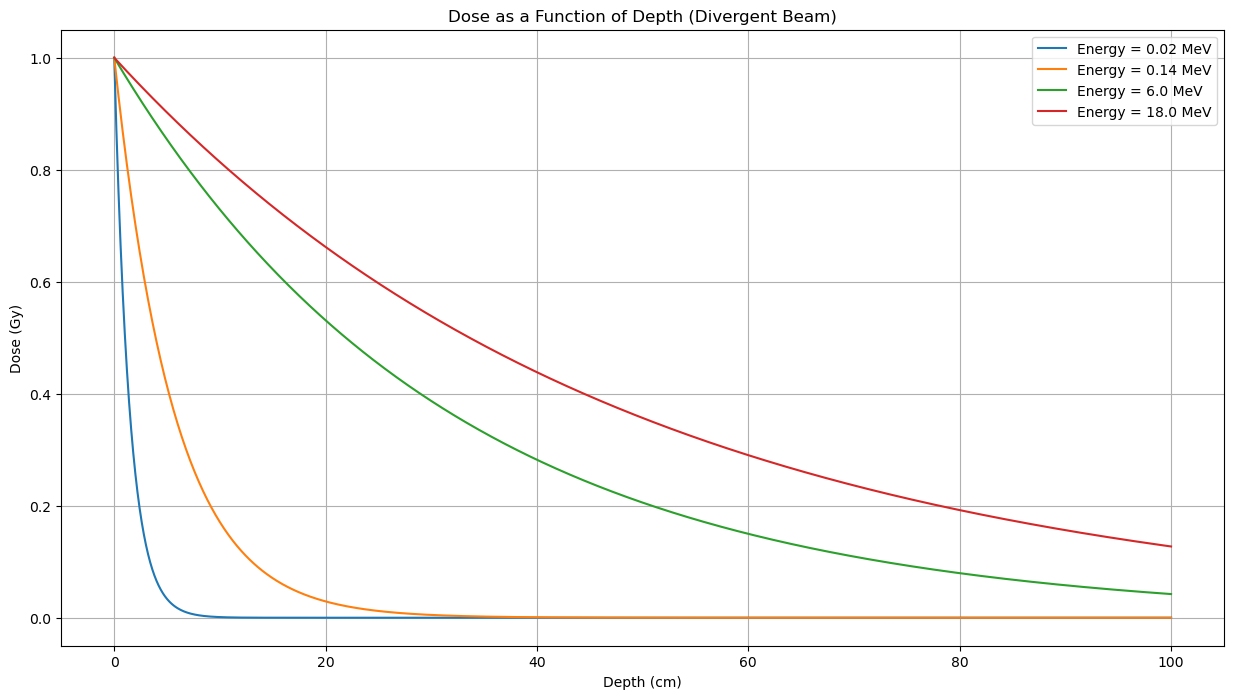

In [ ]:
plt.figure(figsize=(15, 8))

for i in range(doseDepthParallel.shape[0]):
    plt.plot(depth, doseDepthParallel[i]/np.max(doseDepthParallel[i]), label='Energy = ' + str(newEnergy[i]) + ' MeV')
    
plt.legend()
plt.title('Dose as a Function of Depth (Divergent Beam)')
plt.xlabel('Depth (cm)')
plt.ylabel('Dose (Gy)')
plt.grid(True)
plt.show()

## **Question 3**

On considère que le faisceau est **divergent**. Calculer et tracer la dose en fonction de la profondeur (pas de 1mm). **Normaliser** au maximum de dose puis tracer sur le même graphe les quatre rendements en profondeur de la dose absorbée due aux photons primaires. Commenter au regard des rendements en profondeur vus en cours ou trouvés sur internet.



In [ ]:
def compute_dose_depth_divergent(dose, depth):
    return np.asarray(dose * (100/(100+depth))**2)

doseDepthDivergent = compute_dose_depth_divergent(doseDepthParallel, depth)

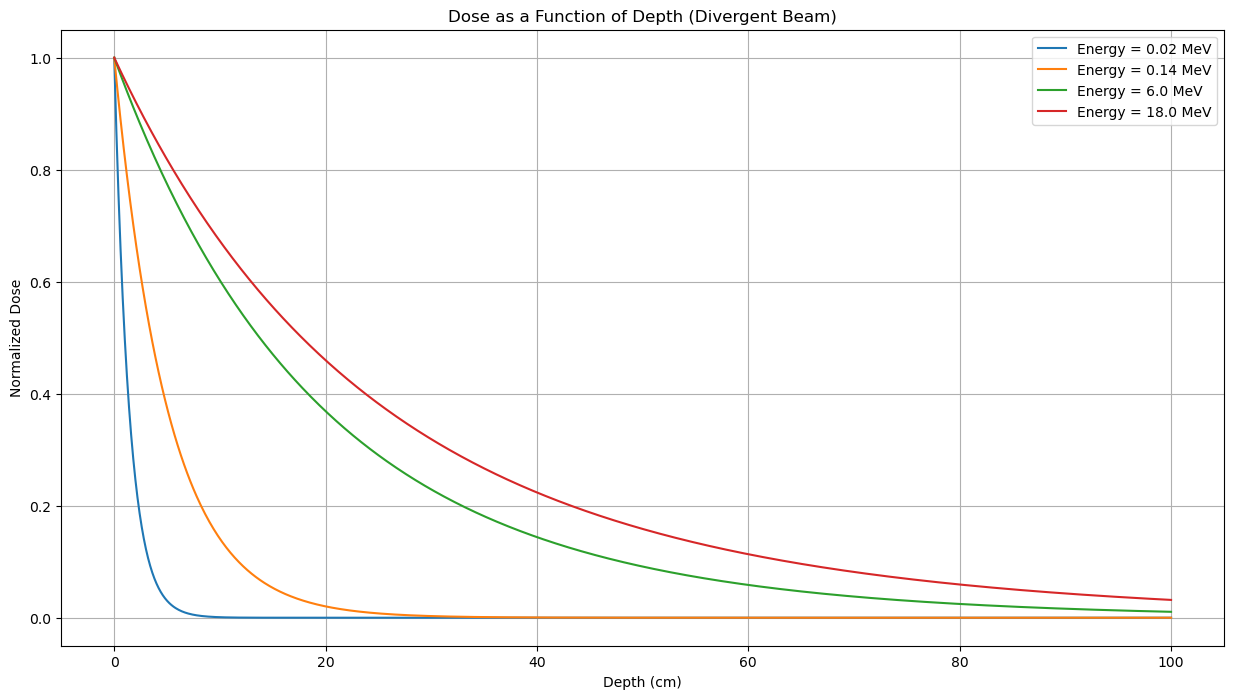

In [ ]:
plt.figure(figsize=(15, 8))

for i in range(doseDepthDivergent.shape[0]):
    plt.plot(depth, doseDepthDivergent[i] / np.max(doseDepthDivergent[i]), label='Energy = ' + str(newEnergy[i]) + ' MeV')

plt.legend()
plt.title('Dose as a Function of Depth (Divergent Beam)')
plt.xlabel('Depth (cm)')
plt.ylabel('Normalized Dose')
plt.grid(True)
plt.show()

In [ ]:
dose50cm = doseDepthDivergent[:,np.where(depth == 50)[0]].ravel()
print(dose50cm)
print(tab.tabulate(np.array([newEnergy, dose50cm]).T, headers=['Energy (MeV)', 'Dose at 50 cm (Gy)'],tablefmt='fancy_outline'))

[9.68202465e-17 4.46988866e-06 1.80873858e-01 7.10334049e-01]
╒════════════════╤══════════════════════╕
│   Energy (MeV) │   Dose at 50 cm (Gy) │
╞════════════════╪══════════════════════╡
│           0.02 │          9.68202e-17 │
│           0.14 │          4.46989e-06 │
│           6    │          0.180874    │
│          18    │          0.710334    │
╘════════════════╧══════════════════════╛


## **Question 5**

On souhaite, pour une application en radioprotection, avoir une **fluence en sortie** du fantôme de 1 photon/mm2. Calculer la dose en entrée correspondante, ainsi que la dose à 10 cm de profondeur. Commenter.

In [ ]:
flux_End = 1e2
mass = 1e-3
def compute_Flux(mu_att, rho, flux_End):
    return (flux_End / np.exp(-mu_att * rho * 100))* (200/100)**2


flux_Entre = compute_Flux(mu_att_pred, 1.19, flux_End)
flux_Entre

array([1.35708847e+32, 1.91223200e+10, 9.46801493e+03, 3.14397513e+03])

In [ ]:
print(tab.tabulate(np.array([newEnergy, flux_Entre]).T, headers=['Energy (MeV)', 'Flux enter (Gy)'],tablefmt='fancy_outline'))

╒════════════════╤═══════════════════╕
│   Energy (MeV) │   Flux enter (Gy) │
╞════════════════╪═══════════════════╡
│           0.02 │       1.35709e+32 │
│           0.14 │       1.91223e+10 │
│           6    │    9468.01        │
│          18    │    3143.98        │
╘════════════════╧═══════════════════╛


In [ ]:
compute_dose(mu_en_pred, 1.19, flux_Entre, mass, newEnergy)

array([1.72199127e+20, 1.32971969e-02, 1.87463502e-07, 1.40874961e-07])